In this exercise, we'd like to compute the shear and normal stress on fault planes of various orientations and determine if the stresses on these planes are sufficient to allow slip.

In [1]:
# The exercise works by running the code in each cell.  This is the first cell of code.
# To run it, we click in the cell and then press the "Run" button above.

# we'll need some specialised functions for our analysis
import matplotlib.pyplot as plt
from numpy import linspace,pi,cos,sin,array,argmax,divide
print('You have imported some useful functions')

You have imported some useful functions


Now we can specify the principal stresses acting on our region of interest.  We'll pick $\sigma_1 = 50$ MPa and $\sigma_3 = 20$ MPa, with the orientations as shown below.

In [2]:
# specify the principal stresses, in MPa
sigma1=150
sigma3=60

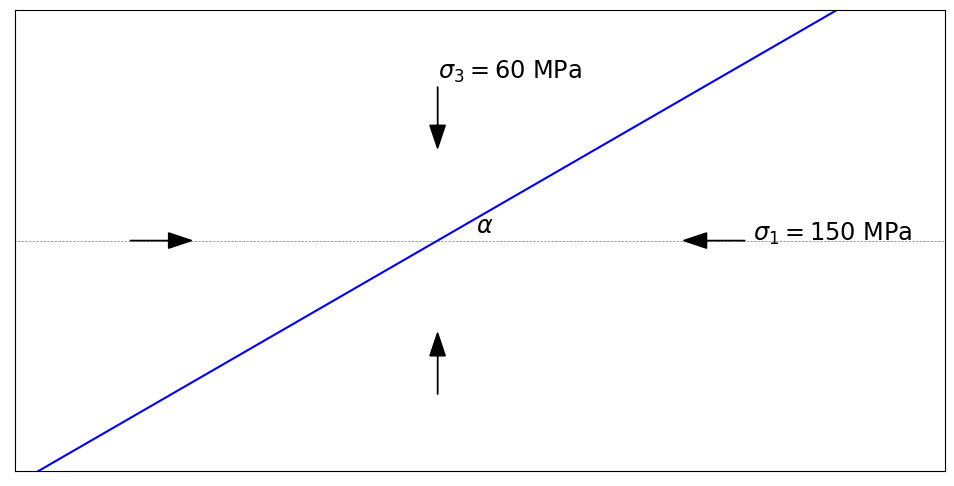

In [3]:
# this cell just plots an illustration of the stress field

plt.figure(figsize=(12,8))

plt.arrow(-4,0,0.5,0,head_width=0.2,color='black');
plt.arrow(4,0,-0.5,0,head_width=0.2,color='black');
plt.arrow(0,-2,0,0.5,head_width=0.2,color='black');
plt.arrow(0,2,0,-0.5,head_width=0.2,color='black');

plt.xlim([-5.5,6.6]);
plt.ylim([-3,3]);
plt.text(4.1,0,'$\sigma_1 = $'+'{:0.0f} MPa'.format(sigma1),fontsize='xx-large');
plt.text(0,2.1,'$\sigma_3 = $'+'{:0.0f} MPa'.format(sigma3),fontsize='xx-large');

plt.plot([-10,10],[0,0],linestyle='--',linewidth=0.5,
         color='gray',zorder=0)
plt.gca().set_aspect('equal')

alph=30.
xvl,yvl=cos(alph*pi/180),sin(alph*pi/180)
plt.plot([-xvl*10,xvl*10],[-yvl*10,yvl*10],color='blue');
plt.text(0.5,0.1,r'$\alpha$',fontsize='xx-large');
plt.xticks([]);
plt.yticks([]);


In [4]:
# now let's calculate the shear and normal stresses for a range of fault orientations

# a set of specific orientations
alph_spec=array([0,10,20,30,40,50,60,70,80,90])
alph_spec_rad = alph_spec * pi / 180

# and a larger suite of orientations
alph = linspace(0,90,3000)
alph_rad = alph * pi / 180

# compute the shear stresses
tau=(sigma1-sigma3)/2*sin(alph_rad*2)
tau_spec=(sigma1-sigma3)/2*sin(alph_spec_rad*2)

# and the normal stresses
sigma=(sigma1+sigma3)/2-(sigma1-sigma3)/2*cos(alph_rad*2)
sigma_spec=(sigma1+sigma3)/2-(sigma1-sigma3)/2*cos(alph_spec_rad*2)

# note the max stress for later
maxstress=max(sigma)*1.2

We can compute the shear stresses on a fault with orientation $\alpha$ via

$$\tau = \frac{\sigma_1-\sigma_3}{2}\sin(2\alpha)$$

And the normal stress on a fault with orientation $\alpha$ via

$$\sigma = \frac{\sigma_1+\sigma_3}{2} - \frac{\sigma_1-\sigma_3}{2}\cos(2\alpha)$$

Let's plot these shear and normal stresses below


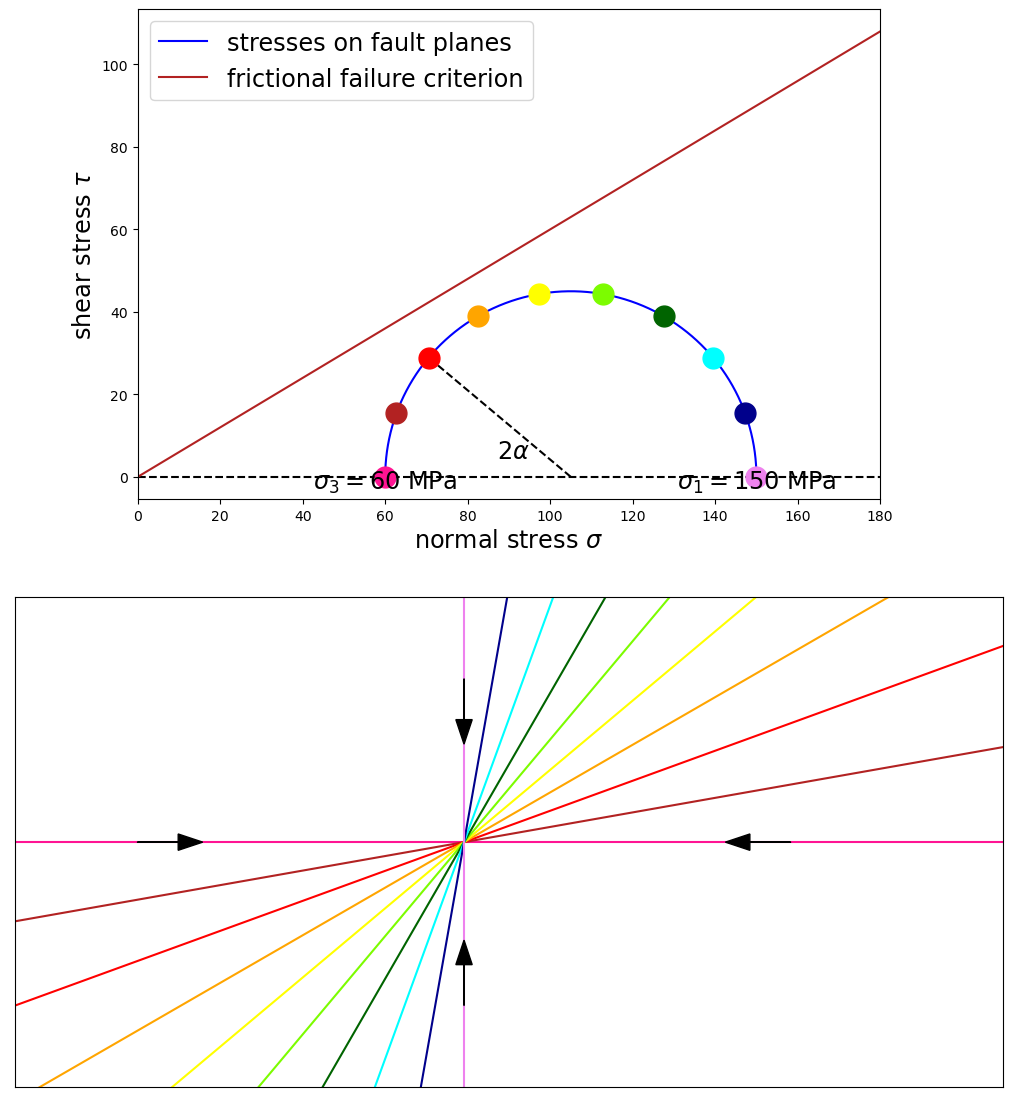

In [5]:
f,p=plt.subplots(2,1,figsize=(14,14));
p1,p2=p[0],p[1]
hp,=p1.plot(sigma,tau,color='blue',label='stresses on fault planes');
p1.set_aspect('equal')
p1.set_xlim([0,max(sigma)*1.5]);

p1.set_xlabel(r'normal stress $\sigma$',fontsize='xx-large');
p1.set_ylabel(r'shear stress $\tau$',fontsize='xx-large');


plt.sca(p2)
plt.arrow(-4,0,0.5,0,head_width=0.2,color='black');
plt.arrow(4,0,-0.5,0,head_width=0.2,color='black');
plt.arrow(0,-2,0,0.5,head_width=0.2,color='black');
plt.arrow(0,2,0,-0.5,head_width=0.2,color='black');

plt.xlim([-5.5,6.6]);
plt.ylim([-3,3]);
p1.text(sigma1,-3,'$\sigma_1 = $'+'{:0.0f} MPa'.format(sigma1),fontsize='xx-large',
        horizontalalignment='center');
p1.text(sigma3,-3,'$\sigma_3 = $'+'{:0.0f} MPa'.format(sigma3),fontsize='xx-large',
        horizontalalignment='center');

plt.plot([-10,10],[0,0],linestyle='--',linewidth=0.5,
         color='gray',zorder=0)
plt.gca().set_aspect('equal')

cols=['deeppink','firebrick','red','orange','yellow','lawngreen','darkgreen','cyan','darkblue','violet']
for k in range(0,len(alph_spec)):
    xvl,yvl=cos(alph_spec_rad[k]),sin(alph_spec_rad[k])
    plt.plot([-xvl*10,xvl*10],[-yvl*10,yvl*10],color=cols[k],zorder=0)
    p1.plot(sigma_spec[k],tau_spec[k],marker='o',linestyle='none',markersize=15,color=cols[k])
    
p1.plot([(sigma1+sigma3)/2,sigma_spec[2]],[0,tau_spec[2]],color='black',zorder=0,linestyle='--');
p1.plot([0,maxstress],[0,0],color='black',linestyle='--',zorder=0)
p1.text((sigma1+sigma3)/2-(sigma1-sigma3)/5,(sigma1-sigma3)/20,r'$2\alpha$',fontsize='xx-large')
p1.set_xlim([0,maxstress])
plt.xticks([]);
plt.yticks([]);

mu=0.6
hf,=p1.plot([0,maxstress],[0,maxstress*mu],color='firebrick',label='frictional failure criterion')
p1.legend([hp,hf],['stresses on fault planes','frictional failure criterion'],fontsize='xx-large');



The blue curve above shows the stresses on the fault planes that are created by the specified principal stresses.  Let's go ahead and replot that curve along with a frictional failure criterion, which tells us the maximum shear stress that a fault can support:
$$\tau = \mu \sigma.$$
For now, we'll assume that the coefficient of friction $\mu = 0.6$.



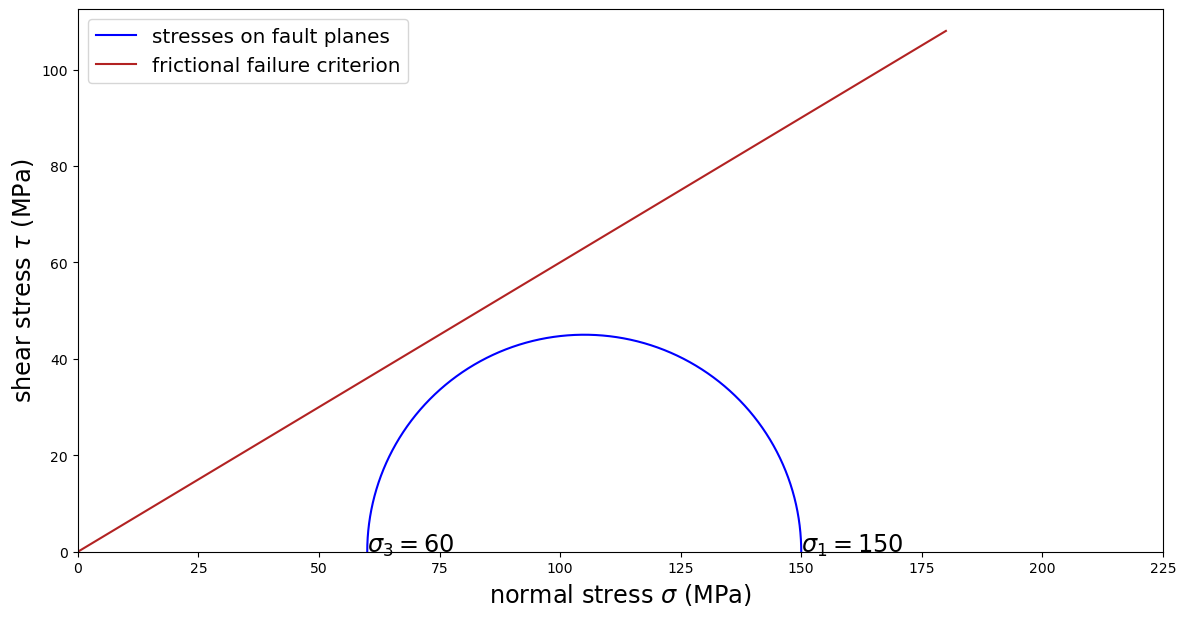

In [6]:
f=plt.figure(figsize=(14,10))
p1=plt.gca()
hs,=p1.plot(sigma,tau,color='blue',label='stresses on fault planes');
p1.set_aspect('equal')
p1.set_xlim([0,max(sigma)*1.5]);
p1.set_ylim([0,max(sigma)*1.5*0.5])
mu=0.6
hf,=p1.plot([0,maxstress],[0,maxstress*mu],color='firebrick',label='frictional failure criterion')

p1.set_xlabel(r'normal stress $\sigma$ (MPa)',fontsize='xx-large');
p1.set_ylabel(r'shear stress $\tau$ (MPa)',fontsize='xx-large');
p1.legend(fontsize='x-large');
p1.text(sigma1,0,'$\sigma_1=${:0.0f}'.format(sigma1),fontsize='xx-large');
p1.text(sigma3,0,'$\sigma_3=${:0.0f}'.format(sigma3),fontsize='xx-large');

Given the principal stresses above, all fault planes have shear and normal stresses below the failure criterion, and they don't slip.  

But let's start increasing the most compressive stress $\sigma_1$ until some fault does reach the failure criterion.

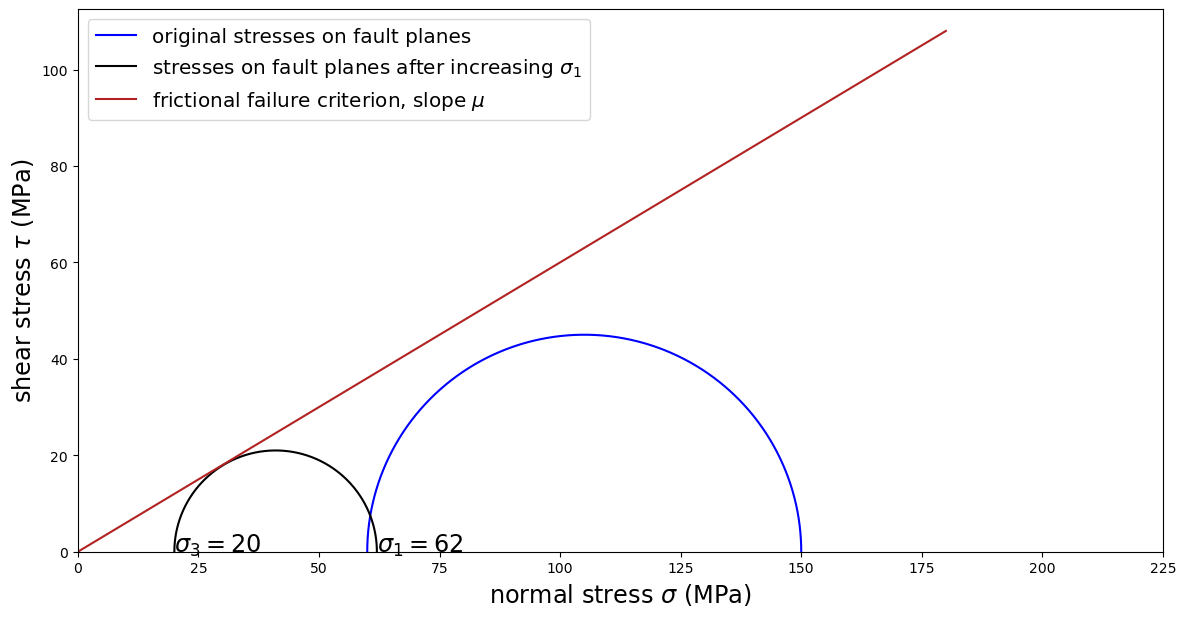

In [7]:
# calculate the new stresses
sigma1_new,sigma3_new=62,20
sigma_new=(sigma1_new+sigma3_new)/2-(sigma1_new-sigma3_new)/2*cos(alph_rad*2)
tau_new=(sigma1_new-sigma3_new)/2*sin(alph_rad*2)

# and plot them
f=plt.figure(figsize=(14,10))
p1=plt.gca()
hs,=p1.plot(sigma,tau,color='blue',label='original stresses on fault planes');
hn,=p1.plot(sigma_new,tau_new,color='black',label='stresses on fault planes after increasing $\sigma_1$');
p1.set_aspect('equal')
p1.set_xlim([0,max(sigma)*1.5]);
p1.set_ylim([0,max(sigma)*1.5*0.5])
mu=0.6
hf,=p1.plot([0,maxstress],[0,maxstress*mu],color='firebrick',label='frictional failure criterion, slope $\mu$')

p1.set_xlabel(r'normal stress $\sigma$ (MPa)',fontsize='xx-large');
p1.set_ylabel(r'shear stress $\tau$ (MPa)',fontsize='xx-large');
p1.legend(fontsize='x-large');
p1.text(sigma1_new,0,'$\sigma_1=${:0.0f}'.format(sigma1_new),fontsize='xx-large');
p1.text(sigma3_new,0,'$\sigma_3=${:0.0f}'.format(sigma3_new),fontsize='xx-large');


The fault plane that is going to fail is the one that first touches the failure criterion.  We can use some trigonometry to determine its orientation $\alpha$.  Note that if the failure criterion has slope $\mu$, equal to the coefficient of friction, the angle below that the failure criterion line is 
$$\phi = \tan^{-1}(\mu).$$
$\phi$ is often called the friction angle.

Since the sum of the angles in a triangle must sum to 180$^{\circ}$, and since the failure criterion must be tangent to the Mohr circle when they just touch, we determine that

$$\alpha = 90^{\circ} - \frac{1}{2}\tan^{1}(\mu)$$

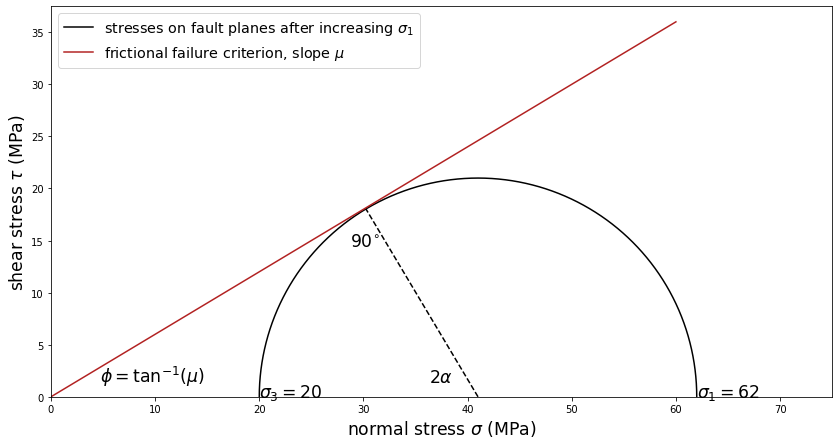

In [154]:
#comment  

# and plot the new stresses
f=plt.figure(figsize=(14,10))
p1=plt.gca()
hn,=p1.plot(sigma_new,tau_new,color='black',label='stresses on fault planes after increasing $\sigma_1$');
p1.set_aspect('equal')
p1.set_xlim([0,max(sigma)*1.5]);
p1.set_ylim([0,max(sigma)*1.5*0.5])
mu=0.6
hf,=p1.plot([0,maxstress],[0,maxstress*mu],color='firebrick',label='frictional failure criterion, slope $\mu$')

p1.set_xlabel(r'normal stress $\sigma$ (MPa)',fontsize='xx-large');
p1.set_ylabel(r'shear stress $\tau$ (MPa)',fontsize='xx-large');
p1.legend(fontsize='x-large');
p1.text(sigma1_new,0,'$\sigma_1=${:0.0f}'.format(sigma1_new),fontsize='xx-large');
p1.text(sigma3_new,0,'$\sigma_3=${:0.0f}'.format(sigma3_new),fontsize='xx-large');

ix=argmax(divide(tau_new,sigma_new));
p1.plot([(sigma1_new+sigma3_new)/2,sigma_new[ix]],[0,tau_new[ix]],color='black',zorder=0,linestyle='--');
p1.text((sigma1_new+sigma3_new)/2-(sigma1_new-sigma3_new)/9,(sigma1_new-sigma3_new)/30,r'$2\alpha$',
        fontsize='xx-large');
p1.text((sigma1_new-sigma3_new)/9,(sigma1_new-sigma3_new)/30,r'$\phi = \tan^{-1}(\mu)$',
        fontsize='xx-large');
p1.text(sigma_new[ix]*0.95,tau_new[ix]*0.8,'90$^{\circ}$',fontsize='xx-large');


Q1: Say a plate collision leads to horizontal compression in a fold and thrust belt, and $\sigma_1$ starts increasing. The rocks have a coefficient of friction $\mu=0.6$.  At what angle do you expect the first faults to form?
<br><br><br>

Q2: What happens after these favourably oriented faults form?  Does the stress keep increasing?
<br><br><br>


Q3: Let's assume the coefficient of friction is positive.  Will $\alpha$ ever be more than 45$^{\circ}$?

Let's say you walk into the field and determine that a single stress field has created two sets of fractures, illustrated below.  Given plausible values of $\alpha$, which of the principal stress directions shown is plausible?
<br><br><br>

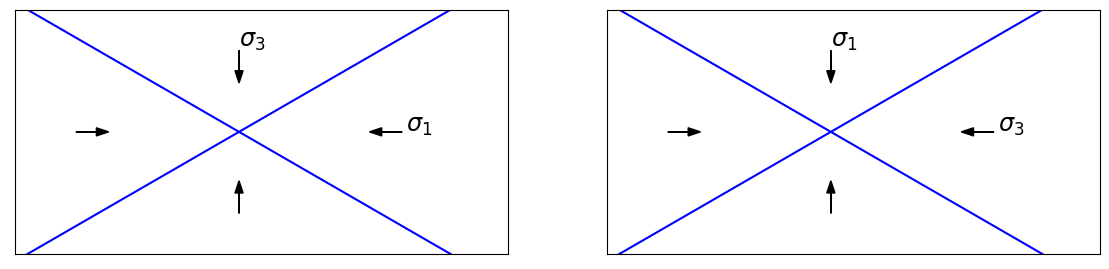

In [8]:
# this cell just plots an illustration of the stress field

f,p=plt.subplots(1,2,figsize=(14,10))

plt.sca(p[0])
plt.arrow(-4,0,0.5,0,head_width=0.2,color='black');
plt.arrow(4,0,-0.5,0,head_width=0.2,color='black');
plt.arrow(0,-2,0,0.5,head_width=0.2,color='black');
plt.arrow(0,2,0,-0.5,head_width=0.2,color='black');

plt.xlim([-5.5,6.6]);
plt.ylim([-3,3]);
plt.text(4.1,0,'$\sigma_1$',fontsize='xx-large');
plt.text(0,2.1,'$\sigma_3$',fontsize='xx-large');

plt.gca().set_aspect('equal')

alph=30.
xvl,yvl=cos(alph*pi/180),sin(alph*pi/180)
plt.plot([-xvl*10,xvl*10],[-yvl*10,yvl*10],color='blue');
plt.plot([-xvl*10,xvl*10],[yvl*10,-yvl*10],color='blue');
plt.xticks([]);
plt.yticks([]);


plt.sca(p[1])
plt.arrow(-4,0,0.5,0,head_width=0.2,color='black');
plt.arrow(4,0,-0.5,0,head_width=0.2,color='black');
plt.arrow(0,-2,0,0.5,head_width=0.2,color='black');
plt.arrow(0,2,0,-0.5,head_width=0.2,color='black');

plt.xlim([-5.5,6.6]);
plt.ylim([-3,3]);
plt.text(4.1,0,'$\sigma_3$',fontsize='xx-large');
plt.text(0,2.1,'$\sigma_1$',fontsize='xx-large');

plt.gca().set_aspect('equal')

alph=30.
xvl,yvl=cos(alph*pi/180),sin(alph*pi/180)
plt.plot([-xvl*10,xvl*10],[-yvl*10,yvl*10],color='blue');
plt.plot([-xvl*10,xvl*10],[yvl*10,-yvl*10],color='blue');
plt.xticks([]);
plt.yticks([]);


Since $\alpha$ is always small, we infer that the orientation of $\sigma_1$ bisects the acute angle between two _conjugate fractures_.

